In [18]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import scipy

import statsmodels.formula.api as smf

import matplotlib.pyplot as plt #画图模块
import matplotlib.dates as mdates #日期格式处理模块
from matplotlib import style #用来自定义图表风格的模块

#magic command
%matplotlib inline
%config InlineBackend.figure_format='svg' #提高分辨率

from matplotlib.font_manager import FontProperties #画图自定义字体
from pylab import mpl #画图自定义字体
mpl.rcParams['font.sans-serif']=['SimHei'] #指定默认字体

# 中国股市回报率

导入数据

In [19]:
#导入数据
data=pd.read_csv('E:/Python Github HW/ZhaoQy/000001-24.9.30.csv')
data['Day']=pd.to_datetime(data['Day'],format='%Y/%m/%d')
data.set_index('Day',inplace=True)
data['Close']=pd.to_numeric(data['Close'],errors='coerce')
data['Preclose']=data['Close'].shift(1)  #实现数据平移，向下移动一行数据
data['Return']=(data['Close']-data['Preclose'])/data['Preclose']
data

,Preclose,Open,Highest,Lowest,Close,Volume,Money,Return
Day,,,,,,,,
1990-12-19,NaN,96.050,99.980,95.790,99.980,126000.00,4.940000e+05,NaN
1990-12-20,99.980,104.300,104.390,99.980,104.390,19700.00,8.400000e+04,0.044109
1990-12-21,104.390,109.070,109.130,103.730,109.130,2800.00,1.600000e+04,0.045407
1990-12-24,109.130,113.570,114.550,109.130,114.550,3200.00,3.100000e+04,0.049666
1990-12-25,114.550,120.090,120.250,114.550,120.250,1500.00,6.000000e+03,0.049760
...,...,...,...,...,...,...,...,...
2024-09-24,2748.918,2770.754,2863.152,2761.372,2863.126,4776195.45,4.427953e+07,0.041547
2024-09-25,2863.126,2901.419,2952.451,2889.048,2896.306,5682598.16,5.166981e+07,0.011589
2024-09-26,2896.306,2893.745,3000.953,2889.014,3000.953,5763192.61,5.246691e+07,0.036131


计算2014-2024的日收益率

In [20]:
data_new=data['2014-09':'2024-09'].copy() #深复制
data_new['Close']=pd.to_numeric(data_new['Close'])
data_new['Preclose']=pd.to_numeric(data_new['Preclose'])
#计算上证指数日收益率
data_new['Raw_return']=data_new['Close']/data_new['Preclose']-1
data_new

,Preclose,Open,Highest,Lowest,Close,Volume,Money,Return,Raw_return
Day,,,,,,,,,
2014-09-01,2217.200,2220.130,2236.290,2217.680,2235.510,1.291666e+10,1.170000e+11,0.008258,0.008258
2014-09-02,2235.510,2239.680,2267.510,2234.380,2266.050,1.921249e+10,1.710000e+11,0.013661,0.013661
2014-09-03,2266.050,2268.390,2290.550,2268.100,2288.630,2.124790e+10,1.880000e+11,0.009964,0.009964
2014-09-04,2288.630,2290.030,2307.700,2283.280,2306.860,1.994900e+10,1.790000e+11,0.007965,0.007965
2014-09-05,2306.860,2311.300,2327.560,2307.450,2326.430,2.131819e+10,1.860000e+11,0.008483,0.008483
...,...,...,...,...,...,...,...,...,...
2024-09-24,2748.918,2770.754,2863.152,2761.372,2863.126,4.776195e+06,4.427953e+07,0.041547,0.041547
2024-09-25,2863.126,2901.419,2952.451,2889.048,2896.306,5.682598e+06,5.166981e+07,0.011589,0.011589
2024-09-26,2896.306,2893.745,3000.953,2889.014,3000.953,5.763193e+06,5.246691e+07,0.036131,0.036131


计算2014-2024的月收益率

In [21]:
Month_data=data_new.resample('ME')['Raw_return'].apply(lambda x:(1+x).prod()-1).to_frame()
Month_data

,Raw_return
Day,
2014-09-30,0.066151
2014-10-31,0.023821
2014-11-30,0.108529
2014-12-31,0.205692
2015-01-31,-0.007519
...,...
2024-05-31,-0.005801
2024-06-30,-0.038684
2024-07-31,-0.009656


# 经济政策不确定性指数（EPU）

导入数据

In [22]:
epu=pd.read_csv('E:/Python Github HW/ZhaoQy/midterm-EPU/EPU 2014-2024.csv')
epu['DATE']=pd.to_datetime(epu['DATE'],format='%Y/%m/%d')
epu.set_index('DATE',inplace=True)
epu.sort_values(by=['DATE'],axis=0,ascending=True)

,EPU
DATE,
2014-09-01,107.909829
2014-10-01,99.813899
2014-11-01,120.133851
2014-12-01,58.899236
2015-01-01,98.034934
...,...
2024-05-01,206.280442
2024-06-01,124.295467
2024-07-01,278.561630


由于前面计算回报率用的是月末数据，而给定的EPU数据为月初数据，所以需要将月初数据-1统一日期形式

In [23]:
epu=pd.read_csv('E:/Python Github HW/ZhaoQy/midterm-EPU/EPU 2014-2024.csv')
epu['DATE']=pd.to_datetime(epu['DATE'],format='%Y/%m/%d')
epu['DATE']=epu['DATE']-pd.DateOffset(1)
epu.set_index('DATE',inplace=True)
epu.sort_values(by=['DATE'],axis=0,ascending=True)

,EPU
DATE,
2014-08-31,107.909829
2014-09-30,99.813899
2014-10-31,120.133851
2014-11-30,58.899236
2014-12-31,98.034934
...,...
2024-04-30,206.280442
2024-05-31,124.295467
2024-06-30,278.561630


# EPU&Return图像

合并Retun&EPU数据

In [24]:
reg_data=pd.merge(Month_data,epu,left_index=True,right_index=True)
reg_data

,Raw_return,EPU
2014-09-30,0.066151,99.813899
2014-10-31,0.023821,120.133851
2014-11-30,0.108529,58.899236
2014-12-31,0.205692,98.034934
2015-01-31,-0.007519,95.111940
...,...,...
2024-04-30,0.020932,206.280442
2024-05-31,-0.005801,124.295467
2024-06-30,-0.038684,278.561630
2024-07-31,-0.009656,207.982326


绘制双Y轴图表

e:\Python class\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


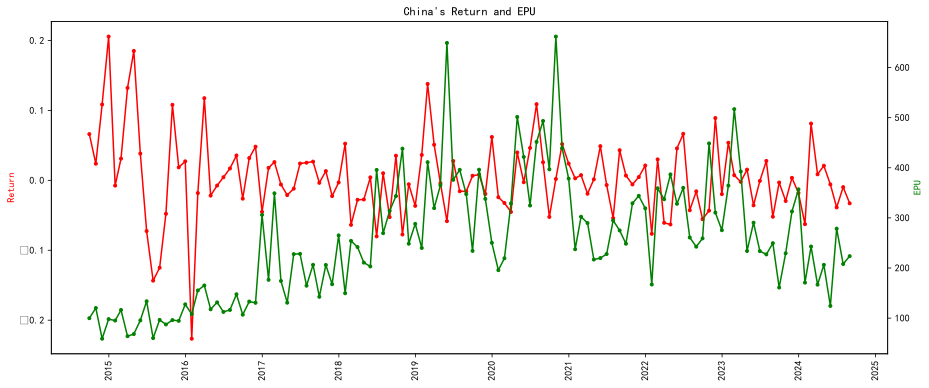

In [26]:
fig,ax1=plt.subplots(figsize=(15,6))

ax1.plot(reg_data['Raw_return'],
         '.-r',
         label='Return')
ax1.set_ylabel('Return',color='r')

data_format=mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format)
ax1.xaxis.set_major_locator(mdates.YearLocator(1))
plt.xticks(rotation=90)

ax2=ax1.twinx()

ax2.plot(reg_data['EPU'],
         '.-g',
         label='EPU')
ax2.set_ylabel('EPU',color='g')

plt.title("China's Return and EPU" )

lines,labels=ax1.get_legend_handles_labels()
lines2,labels2=ax2.get_legend_handles_labels()
ax.legend(lines+lines2,labels+labels2,loc='upper right')

plt.show()


# 描述性统计

In [27]:
reg_data['EPU'].describe().round(4)

count    120.0000
mean     253.3499
std      121.0736
min       58.8992
25%      159.5416
50%      240.8629
75%      331.0905
max      661.8280
Name: EPU, dtype: float64

In [28]:
reg_data.skew().round(4)

Raw_return    0.1585
EPU           0.7031
dtype: float64

In [29]:
reg_data.kurt().round(4)

Raw_return    3.2323
EPU           0.6561
dtype: float64

# OLS回归

## 构建线性回归模型

In [30]:
model_epu=smf.ols('Raw_return~EPU',data=reg_data).fit()
print(model_epu.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.5212
Date:                Fri, 08 Nov 2024   Prob (F-statistic):              0.472
Time:                        14:57:32   Log-Likelihood:                 172.59
No. Observations:                 120   AIC:                            -341.2
Df Residuals:                     118   BIC:                            -335.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0117      0.012      0.955      0.3

- p值>0.05,Adj. R-squared<0
- 模型拟合效果差

## 寻找Return与EPU倒数的线性关系

In [35]:
reg_data['EPU_tr']=1/reg_data['EPU']

In [37]:
model_epu=smf.ols('Raw_return~EPU_tr',data=reg_data).fit()
print(model_epu.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     2.456
Date:                Fri, 08 Nov 2024   Prob (F-statistic):              0.120
Time:                        15:15:23   Log-Likelihood:                 173.57
No. Observations:                 120   AIC:                            -343.1
Df Residuals:                     118   BIC:                            -337.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0099      0.010     -0.976      0.3

## 对数的倒数关系

In [38]:
reg_data['EPU_log']=np.log(reg_data['EPU'])
reg_data['EPU_tr1']=1/reg_data['EPU_log']
model_epu=smf.ols('Raw_return~EPU_tr1',data=reg_data).fit()
print(model_epu.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.717
Date:                Fri, 08 Nov 2024   Prob (F-statistic):              0.193
Time:                        15:32:52   Log-Likelihood:                 173.20
No. Observations:                 120   AIC:                            -342.4
Df Residuals:                     118   BIC:                            -336.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0629      0.051     -1.230      0.2

## 平方的倒数关系

In [39]:
reg_data['EPU_sq']=reg_data['EPU']**2
reg_data['EPU_tr2']=1/reg_data['EPU_sq']
model_epu=smf.ols('Raw_return~EPU_tr2',data=reg_data).fit()
print(model_epu.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     3.378
Date:                Fri, 08 Nov 2024   Prob (F-statistic):             0.0686
Time:                        15:35:17   Log-Likelihood:                 174.02
No. Observations:                 120   AIC:                            -344.0
Df Residuals:                     118   BIC:                            -338.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0032      0.006     -0.497      0.6

# 假设EPU有滞后性

In [63]:
reg_data['LEPU']=reg_data['EPU'].shift(1)
reg_data['EPU_tr3']=1/(reg_data['LEPU']**4)
model_epu=smf.ols('Raw_return~EPU_tr3',data=reg_data).fit()
print(model_epu.summary())


                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     7.401
Date:                Fri, 08 Nov 2024   Prob (F-statistic):            0.00751
Time:                        15:50:20   Log-Likelihood:                 174.64
No. Observations:                 119   AIC:                            -345.3
Df Residuals:                     117   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0012      0.005     -0.227      0.8